In [1]:
asdf=1

1

In [1]:
using Intervalos, Graficador, AutoDif
using PyPlot

INFO: Loading help data...


#[1]
#### Escribe una función que calcule el operador de Newton para un intervalo $X$, dadas $f(x)$ y $f′(x)$.

In [2]:
ptomedio(x::Intervalo)= (x.a + x.b)/2

newtonIntervalo(x::Intervalo,f::Function,ff::Function)= ptomedio(x) - f(ptomedio(x))/ff(x)

newtonIntervalo (generic function with 1 method)

Voy a implementar un par de funciones que den la unión o intersección de un par de intervalos. Si los intervalos no se intersectan las funciones arrojan un error

In [3]:
uNir(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(min(x.a,y.a),max(x.b,y.b)) : 
                                                                return("Deben ser intervalos que se intersectan")
iNtersectar(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(max(x.a,y.a),min(x.b,y.b)) : 
                                                                return("Deben ser intervalos que se intersectan")

iNtersectar (generic function with 1 method)

#[2]
#### Implementa el método de Newton para intervalos para encontrar las raíces de $f(x)=x^3−1$ a partir de $X=[−3,3]$. Muestra gráficamente la implementación del método. En cada iteración subsecuente del método, ilustra qué le pasa al diámetro de la refincación del intervalo que vas obteniendo.

In [13]:
function cerosNewtonAux(x::Intervalo,f::Function,ff::Function,n::Int64)
    if in(0.0,ff(x))
        if x.a<0.0 && x.b>0.0
            return "El intervalo de la derivada contiene al cero"
        end
    end
    if typeof(iNtersectar(x,newtonIntervalo(x,f,ff)))==ASCIIString
        return "El intervalo elegido no contiene ceros de $f(x)"
    end
    if n>100
        println(x)
        return "Más de 100 iteraciones"
    elseif abs(redonUP(-,x.b,x.a))<2.0^-30 
        return x
    else
        n+=1
        cerosNewtonAux( iNtersectar(x,newtonIntervalo(x,f,ff))  , f , ff , n)
    end
end

cerosNewton(x::Intervalo,f::Function,ff::Function)=cerosNewtonAux(x::Intervalo,f::Function,ff::Function,1)

cerosNewton (generic function with 1 method)

In [14]:
f1(x)=x^3-1
f2(x)=3*x^2
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1,f2)

"El intervalo de la derivada contiene al cero"

In [15]:
interv1=Intervalo(3e-02,3)
cerosNewton(interv1,f1,f2)

[9.999999999996638396386008709155080217012860753066769572114956244718861318173878e-01,
1.000000000000370042584027206015784751339542262885839885826171619502992567418929e+00]

In [16]:
interv1=Intervalo(0,3)
cerosNewton(interv1,f1,f2)

[9.999999999996455746958370586872576732910155438046615480108400544854991344101945e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]

Lo siguiente es una representación gráfica de lo que hace el método. Para hacerlo amigable con nosotros solo hice las primeras tres iteraciones.

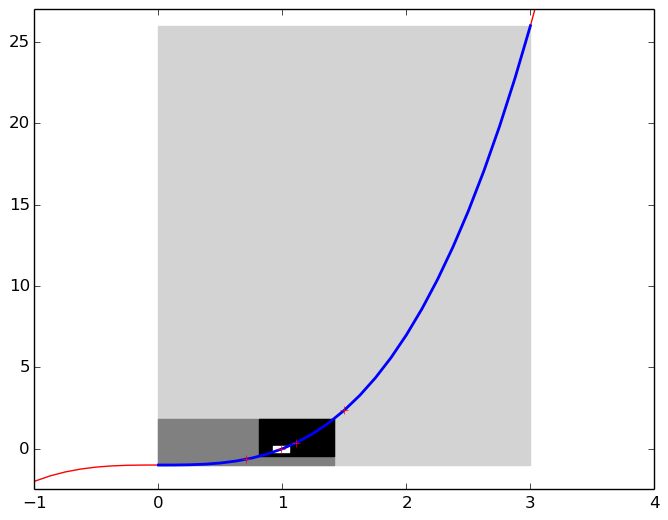

In [17]:
eme=ptomedio(interv1)
graficaarea(float64(interv1.a),float64(interv1.b),f1)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv2=newtonIntervalo(interv1,f1,f2)
interv3=iNtersectar(interv1,interv2)
polY=f1(interv3)
PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY.a),float64(polY.b),color="gray")
eme=ptomedio(interv3)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv4=newtonIntervalo(interv3,f1,f2)
interv5=iNtersectar(interv3,interv4)
polY=f1(interv5)
PyPlot.fill_between(Float64[interv5.a,interv5.b],float64(polY.a),float64(polY.b),color="black")
eme=ptomedio(interv5)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv6=newtonIntervalo(interv5,f1,f2)
interv7=iNtersectar(interv5,interv6)
polY=f1(interv7)
PyPlot.fill_between(Float64[interv7.a,interv7.b],float64(polY.a),float64(polY.b),color="white")
eme=ptomedio(interv7)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")
;

Ahora voy a implementar el método con diferenciación automática, para lo cual agregué la siguiente linea al módulo AutoDif:
`ValorDeriv(x::Intervalo)=ValorDeriv(x,Intervalo(1.0))`

In [18]:
methods(ValorDeriv)

# 3 methods for generic function "ValorDeriv":
ValorDeriv(x::Intervalo) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:19
ValorDeriv(valor,deriv)
ValorDeriv(valor) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:18

In [24]:
newtonIntervalo(x::Intervalo,f::Function)= ptomedio(x) - f(ptomedio(x))/(f(ValorDeriv(x)).deriv)

function cerosNewtonAux(x::Intervalo,f::Function,n::Int64)
    y=f(ValorDeriv(x))
    if in(0.0,y.deriv)
        if x.a<0.0 && x.b>0.0
            return "El intervalo de la derivada contiene al cero"
        end
    end
    if typeof(iNtersectar(x,newtonIntervalo(x,f)))==ASCIIString
        return "El intervalo elegido no contiene ceros de $f(x)"
    end
    if n>100
        println(x)
        return "Más de 100 iteraciones"
    elseif abs(redonUP(-,x.b,x.a))<2.0^-30 
        return x
    else
        n+=1
        cerosNewtonAux( iNtersectar(x,newtonIntervalo(x,f))  , f , n)
    end
end

cerosNewton(x::Intervalo,f::Function)=cerosNewtonAux(x::Intervalo,f::Function,1)

cerosNewton (generic function with 2 methods)

In [25]:
f1(x)=x^3-1
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1)

"El intervalo de la derivada contiene al cero"

In [26]:
interv1=Intervalo(3e-02,3)
cerosNewton(interv1,f1)

[9.999999999996638396386008709155080217012860753066769572114956244718861318173878e-01,
1.000000000000370042584027206015784751339542262885839885826171619502992567418929e+00]

In [27]:
interv1=Intervalo(0,3)
cerosNewton(interv1,f1)

[9.999999999996455746958370586872576732910155438046615480108400544854991344101945e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]

#[3]
##### Usando tu implementación, demuestra que en el mismo intervalo $X=[−3,3]$ que $g(x)=x^2+1$ no tiene ninguna raíz. Ilustra gráficamente esto.

In [240]:
f1(x)=x^2+1
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1)

"El intervalo de la derivada contiene al cero"

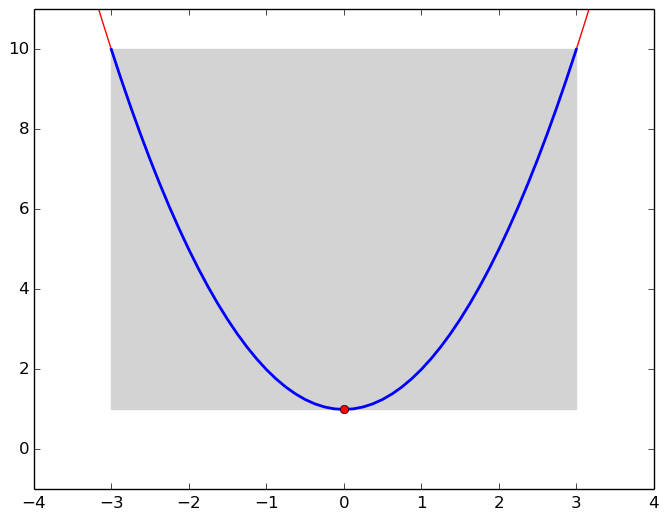

In [241]:
eme=ptomedio(interv1)
graficaarea(float64(interv1.a),float64(interv1.b),f1)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"or")

#interv2=newtonIntervalo(interv1,f1,f2)
#interv3=iNtersectar(interv1,interv2)
#polY=f1(interv3)
#PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY.a),float64(polY.b),color="gray")
#eme=ptomedio(interv3)
#PyPlot.plot(Float64[eme],Float64[f1(eme)],"or")

;

#[4]
##### Considera la familia de polinomios de Wilkinson definidos por $W_n(x)=∏^n_{i=1}(x−i)$. Partiendo de un intervalo simétrico alrededor de cero, implementa el método de Newton para encontrar sus raíces, utilizando diferenciación automática.

In [242]:
function wilkinson(x,n::Int64)
    a=(x-1)
    for i=2:n
        a=a*(x-i)
    end
    return a
end

wilkinson (generic function with 1 method)

In [243]:
asdf=wilkinson(0,2)

2

In [245]:
n=1;
f3(x)=wilkinson(x,n)
interv8=Intervalo(0.5,1.5)
cerosNewton(interv8,f3)

[1e+00,
1e+00]

# División extendida

#[5]
#### Supón que $F′(X)$ sea un intervalo, digamos $F′(X)=[−a,b]$, que contiene $0$ (con $a,b>0$).
#### (i) Definiendo 1/A como el conjunto {1/x:x∈A}, evalúa 1/F′(X).

Sabemos que $1/F′(X)$ debería dar como resultado dos intervalos: $[-∞,-\frac{1}{a}]$ y $[\frac{1}{b},∞]$

Para trabajar con estos intervalos haré que $1/F′(X)$ no arroje un intervalo sino un arreglo de intervalos:

In [279]:
extenDiv(x::Intervalo)=[Intervalo(-inf(BigFloat),(1/Intervalo(x.a)).b),Intervalo((1/Intervalo(x.b)).a,inf(BigFloat))]

extenDiv (generic function with 1 method)

In [280]:
extenDiv(Intervalo(-3,3))

2-element Array{Intervalo,1}:
 [-inf,
-3.333333333333333333333333333333333333333333333333333333333333333333333333333305e-01]
 [3.333333333333333333333333333333333333333333333333333333333333333333333333333305e-01,
inf]  

Nótese que al definirlo hice que el redondeo incluyera el valor que yo quiero. Si lo hubiera definido como 

    extenDiv(x::Intervalo)=[Intervalo(-inf(BigFloat),1/x.a),Intervalo(1/x.b,inf(BigFloat))]

entonces 

    extenDiv(Intervalo(-3,3))

arroja 

    [ [-inf,-3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01], 
        [3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01,inf] ]

Que claramente no contiene los elementos { $-\frac{1}{3}$,$\frac{1}{3}$ }

#### (ii) Define una función que implementa esta "división extendida" de intervalos (o, más bien, inversa extendida).